<a href="https://colab.research.google.com/github/ElProfeDeLosDatos/EDA-con-Python/blob/main/EDA_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA es la sigla en inglés para “Exploratory Data Analysis” (Análisis Exploratorio de Datos) y es una de las primeras tareas que debe realizar un científico de datos. Es cuando se revisan por primera vez los datos que se reciben, por ejemplo, un archivo CSV, y se intenta comprender de qué se trata, vislumbrar posibles patrones y reconocer distribuciones estadísticas que puedan ser útiles en el futuro.

Para crear un EDA simple en Python utilizando Google Colab y con datos tomados desde un archivo CSV guardado en tu Google Drive, puedes seguir los siguientes pasos:

In [41]:
#1 Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
#2 Conectar Google Drive a Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#3 Leer archivo CSV desde Google Drive
df = pd.read_csv('/content/drive/MyDrive/Kagle/HRDataset.csv')

In [43]:
# Convertir la columna "DOB" en un formato de fecha
df['DOB'] = pd.to_datetime(df['DOB'])
# Calcular la edad de cada empleado
now = datetime.now()
df['EDAD'] = (now - df['DOB']).astype('<m8[Y]')

In [44]:
#4 Ver las primeras filas del DataFrame
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,EDAD
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,40.0
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,48.0
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,34.0
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15,34.0
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2,33.0


In [10]:
#5 Contar la frecuencia de valores en la columna Estado Civil (MaritalDesc)
df['MaritalDesc'].value_counts()

Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: MaritalDesc, dtype: int64

In [19]:
#6 Calcular la suma de la columna "salary"
salary_sum = df['Salary'].sum()

# Da formato moneda con 0 decimales a la variable salary_sum
salary_sum_formatted = '${:,.0f}'.format(salary_sum)
print(f'Suma de la columna salary: {salary_sum_formatted}')

# Calcular el promedio de la columna "salary"
salary_mean = df['Salary'].mean()

# Da formato moneda con 0 decimales a la variable salary_mean
salary_mean_formatted = '${:,.0f}'.format(salary_mean)
print(f'Promedio de la columna salary: {salary_mean_formatted}')

Suma de la columna salary: $21,465,433
Promedio de la columna salary: $69,021


CREACION DE GRAFICOS

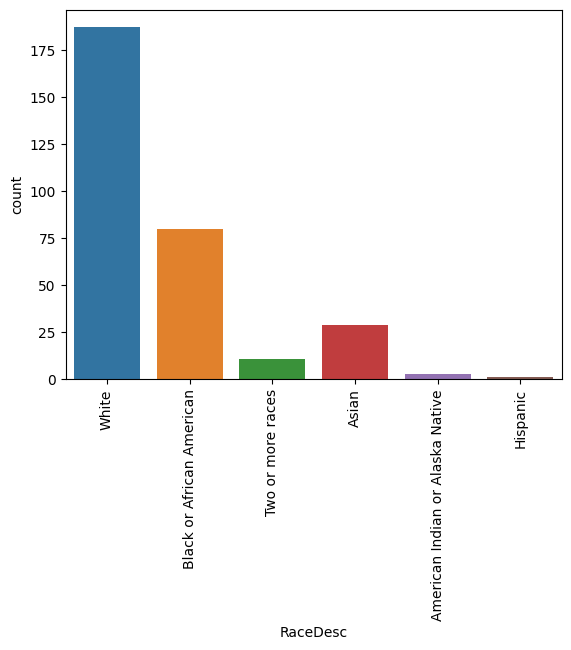

In [25]:
# Crear un gráfico de barras con los sueldos por etnia o raza
ax = sns.countplot(x='RaceDesc', data=df)

# Rotar los títulos del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Mostrar el gráfico
plt.show()


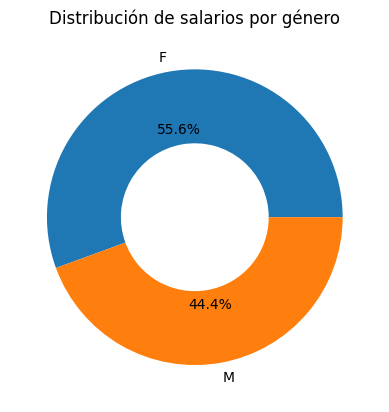

In [40]:
# Calcular la proporción de salarios por género
gender_counts = df['Sex'].value_counts()
gender_salaries = df.groupby('Sex')['Salary'].sum()
gender_proportions = gender_salaries / gender_salaries.sum()

# Crear un gráfico de anillo
plt.pie(gender_proportions, labels=gender_proportions.index, autopct='%1.1f%%', wedgeprops=dict(width=0.5))
plt.title('Distribución de salarios por género')
plt.show()

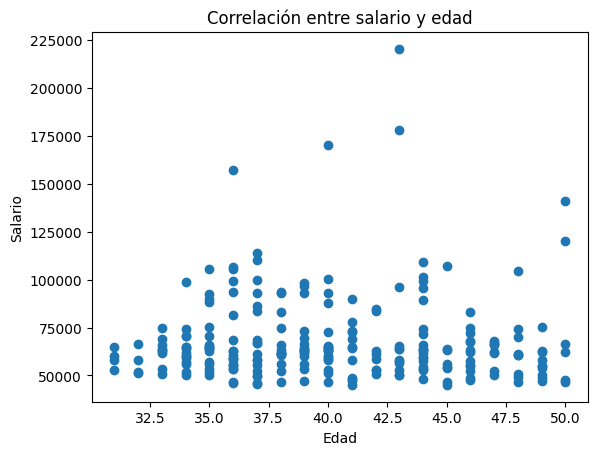

In [49]:

# Crear un gráfico de dispersión para ver la correlacion entre Sueldos y Edad
mask = df['EDAD'] >= 0
filtered_df = df[mask]
plt.scatter(filtered_df['EDAD'], filtered_df['Salary'])
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.title('Correlación entre salario y edad')
plt.show()


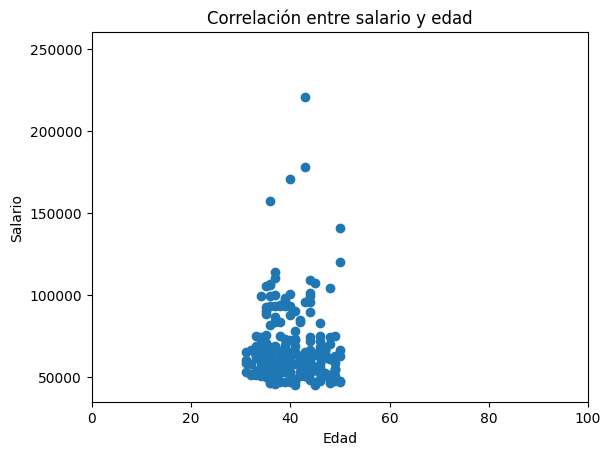

In [52]:
# El mismo grafico pero con una escala mas general
plt.scatter(df['EDAD'], df['Salary'])
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.title('Correlación entre salario y edad')
plt.xlim(0, 100)
plt.show()